signal:
[[ 4]
 [ 2]
 [-9]
 ...
 [ 5]
 [-8]
 [ 8]]
Sparce matrix
zero eigenvalues = 612.0
corresponding eigenvectors:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
signal eigenvalues:
[122787.11177413]
corresponding eigenvectors:
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
guess rank = 1.0
True
theta (degrees) =
[[0.03506821]]


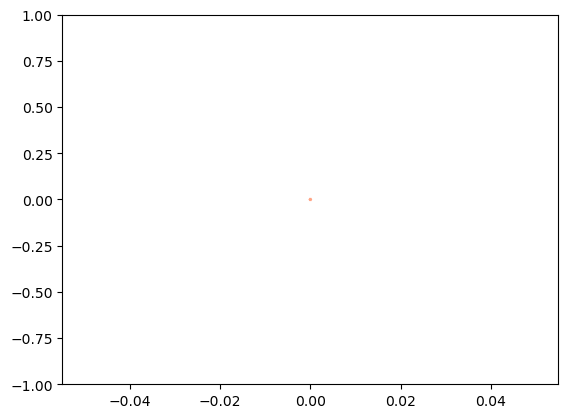

Signal retrieved
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[ 0.01563263]
 [ 0.00781632]
 [-0.03517343]
 ...
 [ 0.01954079]
 [-0.03126527]
 [ 0.03126527]]


/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_24264/2878097583.py:108: RuntimeWarning: invalid value encountered in divide
  yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)


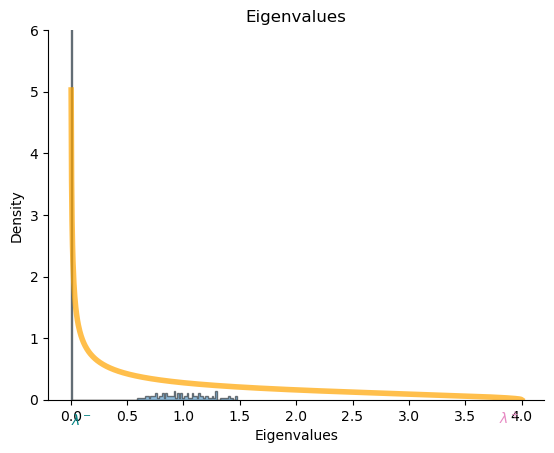

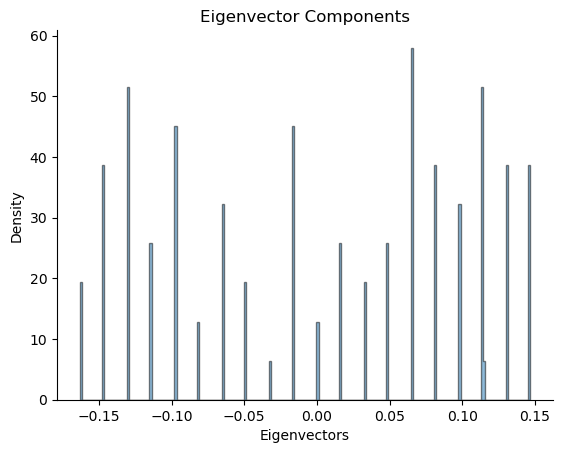

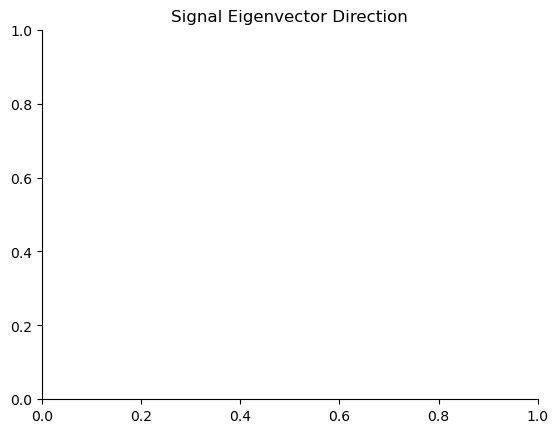

Non-sparcity comparison
zero eigenvalues = 0.0
Signal Eigenvalues:
[2143330.48766571]
Corresponding Eigenvectors:
[[ 0.01565559]
 [ 0.00780699]
 [-0.03516966]
 ...
 [ 0.01956403]
 [-0.03125251]
 [ 0.03126292]]
guess rank = 1.0
True
theta (degrees) =
[[0.03853564]]


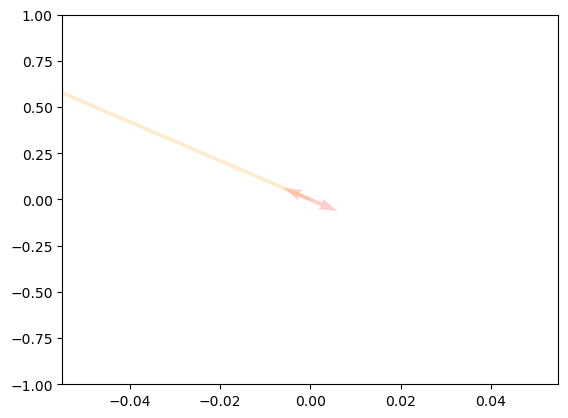

signal retrieved


/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_24264/2878097583.py:193: RuntimeWarning: invalid value encountered in divide
  yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)


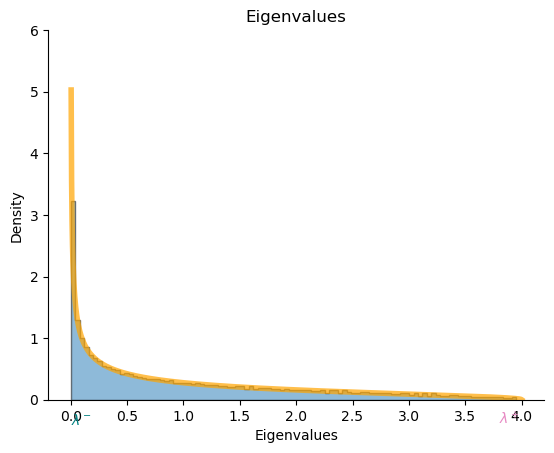

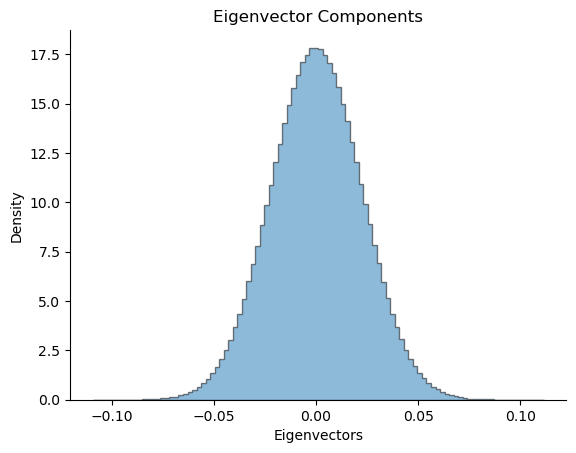

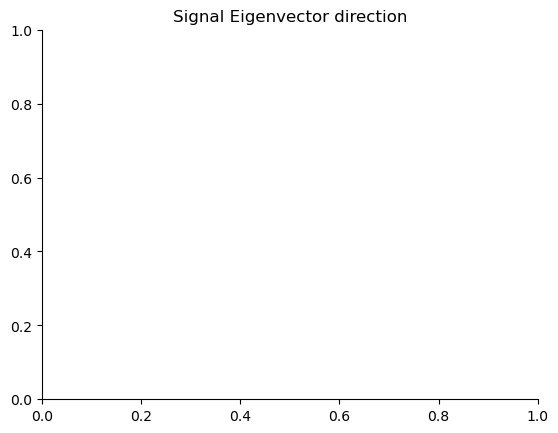

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[  526.31682544   261.96956825 -1180.09069789 ...   656.49594084
  -1048.70557022  1048.99544546]
 [  261.96956825   131.6285254   -588.45444118 ...   327.39484545
   -522.94888592   523.11407969]
 [-1180.09069789  -588.45444118  2652.10216749 ... -1474.7390502
   2355.868635   -2356.60725487]
 ...
 [  656.49594084   327.39484545 -1474.7390502  ...   821.34373122
  -1310.48658063  1310.91527619]
 [-1048.70557022  -522.94888592  2355.868635   ... -1310.48658063
   2094.40617744 -2094.14319299]
 [ 1048.99544546   523.11407969 -2356.60725487 ...  1310.91527619
  -2094.14319299  2095.80300293]]


In [19]:
#noiseless
    #recover rank n subspace
    #guess n
#sparcity
    #recover rank 1
    #guess n
    #error corrections
#matrix is too big
    #linear sketching
    #random projection
    #averaging
#start drafting

import numpy as np
import scipy as sp
from scipy import linalg
from matplotlib import pyplot as plt 

#Wishart Ensamble
#parameters
def denoise(matrix):
    nrows = matrix.shape[0]
    ncols = matrix.shape[1]
    matrix = matrix / (nrows*ncols)
    matrix = matrix * 1e6
    matrix[:,:] = np.log2(np.abs(matrix[:,:]+1))
    for i in range(0, matrix.shape[1]):
        matrix[:,i] = (matrix[:,i] - np.mean(matrix[:,i].all()))*sigma/np.std(matrix[:,i])
    return matrix

r = 1
n = 2000
rank = 1
N = rank
mu, sigma = 0, 1
signal = np.random.randint(-10,10,(int(n * r),N))
Q = signal @ signal.T
X = np.random.randn(int(n * r), n)
prog = np.random.choice(2, (int(n * r),int(n*r)),p=[0.95,0.05])
proj = prog
D = np.diag(np.diag(prog))
P = Q + X
A = D @ P
denoise(A)
W = A @ A.T / n
R = P @ P.T / n
lmax = (1 + np.sqrt(r)) ** 2
lmin = (1 - np.sqrt(r)) ** 2
C = np.array([1.,0.])
origin = np.array([[0, 0],[0, 0,]]) # origin point

#Sparce Matrix
eigs, eivecs = np.linalg.eigh(W)
count = 0
for j in range(0,W.shape[0]-1):
    if eigs[j] == 0:
         count = count + 1
x = eigs[np.abs(eigs) > (n)*lmax/rank]
vecs = eivecs[:, np.arange(int(n*r) - x.shape[0],int(n*r),1)]
print('signal:')
print(signal)
print('Sparce matrix')
print('zero eigenvalues = %0.1f' % count)
print('corresponding eigenvectors:')
print(eivecs[:,np.arange(0,count-1,1)])
print('signal eigenvalues:')
print(x)
print('corresponding eigenvectors:')
print(vecs)
guess = x.shape[0]
print ('guess rank = %0.1f' % guess)
if guess == rank:
    print('True')
else:
    print('False')

if N == 1:
    sigproj = D @ signal
    theta = np.arccos((np.dot(sigproj.T,vecs[:,x.shape[0]-1])/np.sqrt(np.dot(sigproj.T,sigproj)*np.dot(vecs[:,x.shape[0]-1].T,vecs[:,x.shape[0]-1]))))*(180/np.pi)
    print('theta (degrees) =')
    print(theta)
    plt.quiver(*origin, sigproj[:,rank-1][int(n/5)], sigproj[:,rank-1][int(4*n/5)], lw =0.5, alpha=0.1, color="red", scale=0.5)
    plt.quiver(*origin, sigproj[:,rank-1][int(n/5)], sigproj[:,rank-1][int(4*n/5)], lw =0.5, alpha=0.1, color="red", scale=0.5)
    plt.quiver(*origin, vecs[:,x.shape[0]-1][int(n/5)], vecs[:,x.shape[0]-1][int(4*n/5)], lw =0.5, alpha=0.1, color="orange", scale=0.5)
    plt.ylim(-1,1)
    plt.show()
sigguess = vecs
signal = signal / np.sqrt(signal.T @ signal)
if sigguess.all() == signal.all():
    print('Signal retrieved')
else:
    print('Signal unretrieved')
print(sigguess)
print(signal)


eiges = eigs[np.abs(eigs) <= lmax]
plt.title("Eigenvalues")
plt.hist(eiges, density=True, histtype='stepfilled', alpha=0.5, bins=100, ec="k")
plt.xlabel("Eigenvalues")
plt.ylabel("Density")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,6)
    
xx = np.linspace(lmin, lmax, 1000)
if r <= 1:  
    yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)
    plt.plot(xx, yy, lw=4, alpha=0.7, color="orange")
    plt.text(0.95 * lmin, -0.1 * lmax, r"$\lambda^-$", color="teal")
    plt.text(0.95 * lmax, -0.1 * lmax, r"$\lambda^+$", color="#E78AC3")

else: 
    yy = (1-1/r) + np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx) #not able to input dirac-delta and obtain convergence

plt.show()


eivects = np.reshape(vecs,(vecs.shape[0]*vecs.shape[1],1),order='C')
eivects = eivects[np.abs(eivects) > 1e-5]
plt.title("Eigenvector Components")
plt.hist(eivects, density=True, histtype='stepfilled', alpha=0.5, bins=int(n/10), ec="k")
plt.xlabel("Eigenvectors")
plt.ylabel("Density")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

plt.title("Signal Eigenvector Direction")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1)
for i in range(1, vecs.shape[1]):
    V = vecs[:,i]
    V1 = np.array([V[np.random.randint(1, int(n * r) - 1, 1)], V[np.random.randint(1, int(n * r) - 1, 1)]])
    Vn = V1 / (2*np.sqrt(V1.T @ V1))
    if Vn[1] >= 0:    
        plt.quiver(*origin, Vn[0], Vn[1], lw =0.5, alpha=0.01, color="blue", scale=1)
    else:
        plt.quiver(*origin, - Vn[0], - Vn[1], lw =0.01, alpha=0.05, color="blue", scale=1)

plt.show()

#Non-Sparce Matrix
eigrs, eivecrs = np.linalg.eigh(R)
xr = eigrs[np.abs(eigrs) > (n/10)*lmax]
vecrs = eivecrs[:, np.arange(int(n * r) - xr.shape[0],int(n * r),1)]
countr = 0
for j in range(0,int(n*r)-1):
    if eigrs[j] == 0:
        countr = countr + 1
print('Non-sparcity comparison')
print('zero eigenvalues = %0.1f' % countr)
print('Signal Eigenvalues:')
print(xr)
print('Corresponding Eigenvectors:')
print(vecrs)
guessr = xr.shape[0]
print ('guess rank = %0.1f' % guessr)
if guessr == rank:
    print('True')
else:
    print('False')

if N == 1:
    theta_r = np.arccos((np.dot(signal.T,vecrs[:,x.shape[0]-1])/np.sqrt(np.dot(signal.T,signal)*np.dot(vecrs[:,x.shape[0]-1].T,vecrs[:,x.shape[0]-1]))))*(180/np.pi)
    print('theta (degrees) =')
    print(theta_r)
    plt.quiver(*origin, signal[int(n/5)], signal[int(4*n/5)], lw =0.5, alpha=0.1, color="red", scale=0.5)
    plt.quiver(*origin, -signal[int(n/5)], -signal[int(4*n/5)], lw =0.5, alpha=0.1, color="red", scale=0.5)
    plt.quiver(*origin, 500*vecrs[:,xr.shape[0]-1][int(n/5)], 500*vecrs[:,xr.shape[0]-1][int(4*n/5)], lw =0.5, alpha=0.1, color="orange", scale=0.5)
    plt.ylim(-1,1)
    plt.show()
    
sigrguess = vecrs
sigrguess = sigrguess * (3/0.07193743)*np.sqrt(int(n*r)/10)
sigrguess[:,:] = np.rint(sigrguess[:,:])
if sigrguess.all() == signal.all():
    print('signal retrieved')
else:
    print('signal unretrieved')

eigers = eigrs[np.abs(eigrs) <= lmax]
plt.title("Eigenvalues")
plt.hist(eigers, density=True, histtype='stepfilled', alpha=0.5, bins=100, ec="k")
plt.xlabel("Eigenvalues")
plt.ylabel("Density")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,6)

if r <= 1:  
    yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)
    plt.plot(xx, yy, lw=4, alpha=0.7, color="orange")
    plt.text(0.95 * lmin, -0.1 * lmax, r"$\lambda^-$", color="teal")
    plt.text(0.95 * lmax, -0.1 * lmax, r"$\lambda^+$", color="#E78AC3")

else: 
    yy = (1-1/r) + np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx) #not able to input dirac-delta and obtain convergence

plt.show()

eivectrs = np.reshape(eivecrs,(eivecrs.shape[0]*eivecrs.shape[1],1),order='C')
plt.title("Eigenvector Components")
plt.hist(eivectrs, density=True, histtype='stepfilled', alpha=0.5, bins= 100, ec="k")
plt.xlabel("Eigenvectors")
plt.ylabel("Density")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
xx = np.linspace(-0.15, 0.15, 1000)
mu1, sigma1 = 0, np.pi * 10 /n
ynorm = (1/(sigma1*np.sqrt(2*np.pi)))*np.exp(-0.5*np.square((xx-mu1)/sigma1))
if n == 1000:
    plt.plot(xx,ynorm, lw=4, alpha=0.7, color="orange")
plt.show()

plt.title("Signal Eigenvector direction")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1)
for i in range(1, vecrs.shape[1]):
    Vr = vecrs[:,i]
    Vr1 = np.array([Vr[np.random.randint(1, int(n * r) - 1, 1)], Vr[np.random.randint(1, int(n * r) - 1, 1)]])
    Vrn = Vr1 / (2*np.sqrt(Vr1.T @ Vr1))
    if Vrn[1] >= 0:    
        plt.quiver(*origin, Vrn[0], Vrn[1], lw =0.5, alpha=0.01, color="blue", scale=1)
    else:
        plt.quiver(*origin, - Vrn[0], - Vrn[1], lw =0.01, alpha=0.05, color="blue", scale=1)

plt.show()

print(W)
print(R)
